# WeatherPy¶

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [102]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


In [103]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 1 | zhangye
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | sorong
Processing Record 7 of Set 1 | weno
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | freetown
Processing Record 11 of Set 1 | faro
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | la ferte-sous-jouarre
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | motueka
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | fallon
Processing Record 20 of Set 1 | dhuusamarreeb
Processing Record 21 of Set 1 | longyearbyen
Proces

Processing Record 39 of Set 4 | cascais
Processing Record 40 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 41 of Set 4 | susuman
Processing Record 42 of Set 4 | gadzhiyevo
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | prainha
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | tulagi
Processing Record 47 of Set 4 | chengde
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 0 of Set 5 | maracas
Processing Record 1 of Set 5 | mongo
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | camiri
Processing Record 4 of Set 5 | ghormach
Processing Record 5 of Set 5 | al marj
Processing Record 6 of Set 5 | mishkovo-pohorilove
Processing Record 7 of Set 5 | baramula
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | woodward
Processing Record 10 of Set 5 | gondal
Processing Record 11 of Set 5 | sinop
Processing Record 12 of Set 5 | nova

Processing Record 31 of Set 8 | bollnas
Processing Record 32 of Set 8 | port saint john's
Processing Record 33 of Set 8 | yamada
Processing Record 34 of Set 8 | binzhou
Processing Record 35 of Set 8 | togur
Processing Record 36 of Set 8 | usinsk
Processing Record 37 of Set 8 | kargopol'
Processing Record 38 of Set 8 | vadso
Processing Record 39 of Set 8 | llallagua
Processing Record 40 of Set 8 | guaratuba
Processing Record 41 of Set 8 | karasburg
Processing Record 42 of Set 8 | mombasa
Processing Record 43 of Set 8 | cururupu
Processing Record 44 of Set 8 | monticello
Processing Record 45 of Set 8 | novyy urengoy
Processing Record 46 of Set 8 | porto franco
Processing Record 47 of Set 8 | bengkulu
Processing Record 48 of Set 8 | salym
Processing Record 49 of Set 8 | stanley
Processing Record 0 of Set 9 | araucaria
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | mandal
Processing Record 3 of Set 9 | sibu
Processing Record 4 of Set 9 | namdrik
Processing Record

Processing Record 20 of Set 12 | rakops
Processing Record 21 of Set 12 | shakawe
Processing Record 22 of Set 12 | sakaiminato
Processing Record 23 of Set 12 | vangaindrano
Processing Record 24 of Set 12 | dili
-----------------------------
Data Retrieval Complete      
-----------------------------


In [115]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [116]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,275.25,85,98,1.20,US,1704542009
1,zhangye,38.9342,100.4517,270.65,35,6,1.91,CN,1704541712
2,touros,-5.1989,-35.4608,302.63,62,96,5.38,BR,1704542011
3,west island,-12.1568,96.8225,301.14,89,40,4.12,CC,1704542011
4,sorong,-0.8833,131.2500,300.81,78,100,1.16,ID,1704542013


In [117]:
# output_data = "C:/Users/karun/Bootcamp_UWA/06-Python-APIs/APIChallenge/python-api-challenge/WeatherPy/output_data"
# output_path = os.path.join(output_data, "cities.csv")

# # Create the directory 
# os.makedirs(output_data, exist_ok=True)

# # Save the DataFrame to a CSV file
# city_data_df.to_csv(output_path, index_label="City_ID")

output_data = "output_data"
output_path = os.path.join(output_data, "cities.csv")

# Create the directory 
os.makedirs(output_data, exist_ok=True)

# Save the DataFrame to a CSV file
city_data_df.to_csv(output_path, index_label="City_ID")




In [118]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Convert the temperature from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,2.10,85,98,1.20,US,1704542009
1,zhangye,38.9342,100.4517,-2.50,35,6,1.91,CN,1704541712
2,touros,-5.1989,-35.4608,29.48,62,96,5.38,BR,1704542011
3,west island,-12.1568,96.8225,27.99,89,40,4.12,CC,1704542011
4,sorong,-0.8833,131.2500,27.66,78,100,1.16,ID,1704542013


# Create the Scatter Plots Requested

## Latitude Vs. Temperature

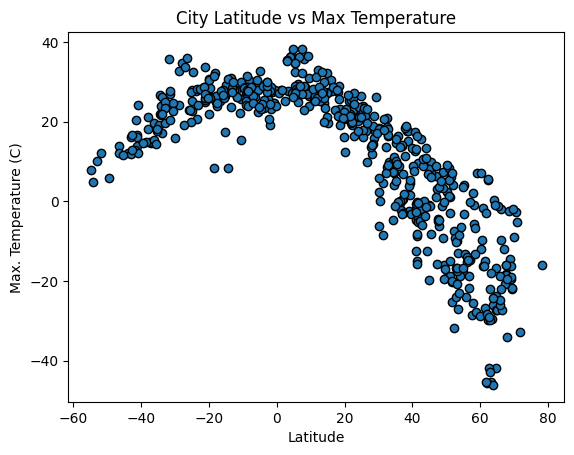

In [119]:
# Build scatter plot for latitude vs. temperature

x_values=city_data_df["Lat"]
y_values= city_data_df["Max Temp"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")

# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (C)')
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude Vs. Humidity

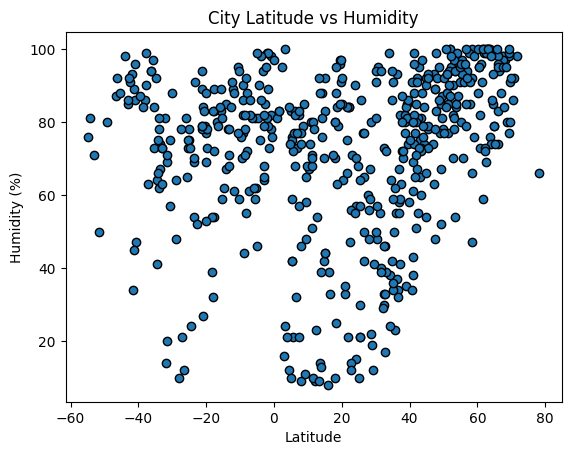

In [120]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Humidity"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude Vs. Cloudiness

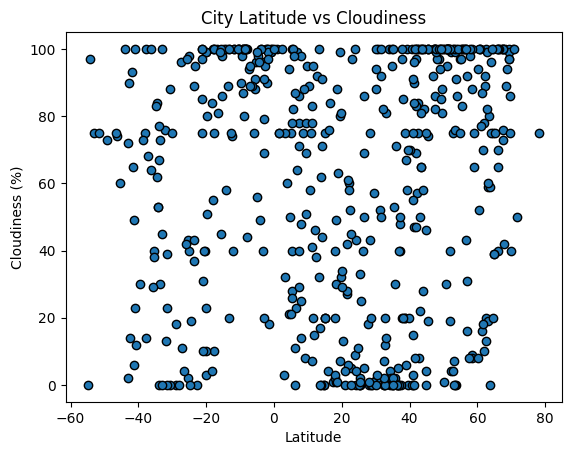

In [121]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Cloudiness"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")


# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

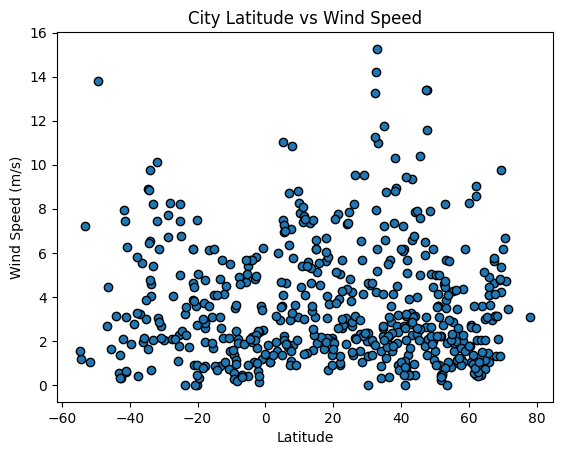

In [122]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Wind Speed"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")


# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [123]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
# Plot scatter plot
    plt.scatter(x_values,y_values)

# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    plt.tight_layout()

In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,2.10,85,98,1.20,US,1704542009
1,zhangye,38.9342,100.4517,-2.50,35,6,1.91,CN,1704541712
5,weno,7.4515,151.8468,28.68,77,78,7.10,FM,1704542014
8,freetown,8.4840,-13.2299,28.84,79,75,3.09,SL,1704542016
9,faro,37.0194,-7.9322,13.88,58,0,3.60,PT,1704542017


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,touros,-5.1989,-35.4608,29.48,62,96,5.38,BR,1704542011
3,west island,-12.1568,96.8225,27.99,89,40,4.12,CC,1704542011
4,sorong,-0.8833,131.2500,27.66,78,100,1.16,ID,1704542013
6,bredasdorp,-34.5322,20.0403,26.61,41,62,8.92,ZA,1704542015
7,port-aux-francais,-49.3500,70.2167,5.90,80,73,13.81,TF,1704541759


# Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8798181330892894


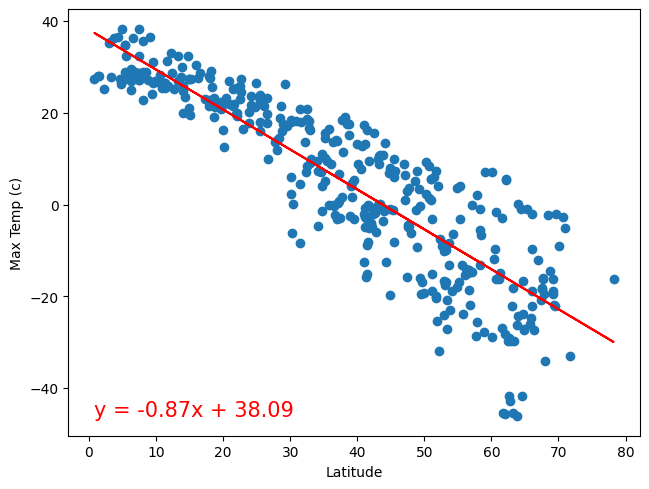

In [126]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
plt.show()

The r-value is: 0.6165994674164054


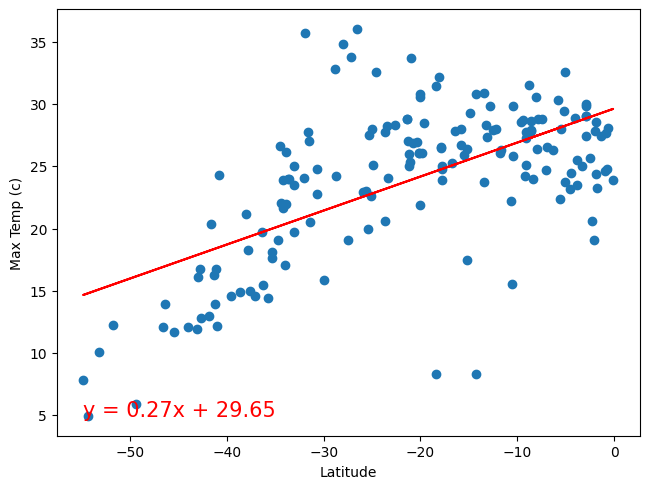

In [127]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is r=−0.87 which means there is a strong negative correlation between latitude and maximum temperature in the Northern Hemisphere.
In other words as the latitude increases (moving away from the equator), the temperature tends to decrease.

Linear regression on Southern Hemisphere is r=0.62 which means there is a moderate positive correlation between latitude and maximum temperature in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), the temperature tends to increase.

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4915750182164998


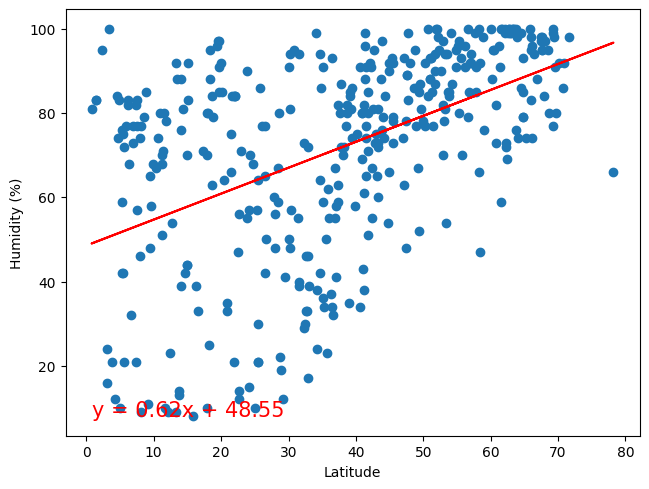

In [128]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.10148895702544738


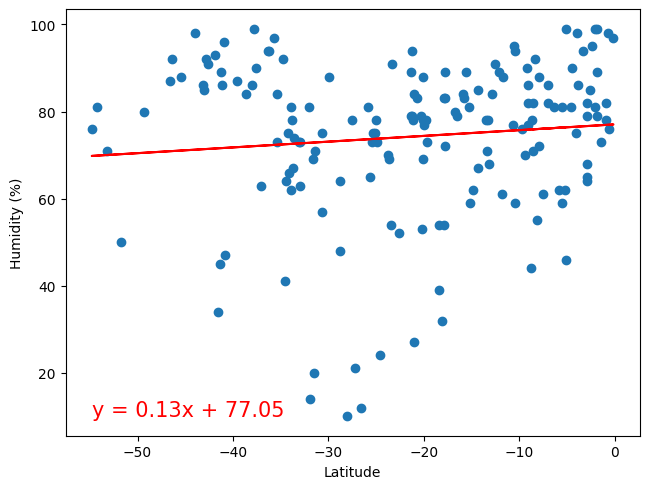

In [129]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is  r=0.49, which means there are moderate positive correlation between latitude and humidity percentage in Northern hemisphere. 
In other words as latitude increases (moving away from the equator), humidity tends to increase.

Linear regression on Southern Hemisphere is r=0.1 which means there is a weak positive correlation between latitude and humidity percentage in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), the humidity tends to increase, but the correlation is not as strong as Northern Hemisphere. 

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2844058802261129


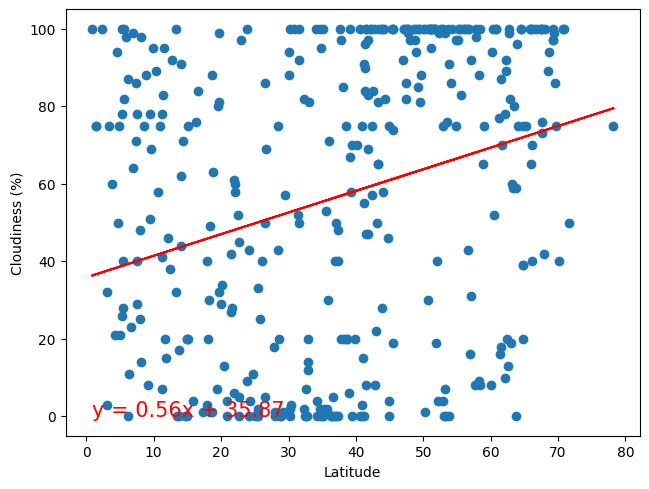

In [130]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.38865045614716176


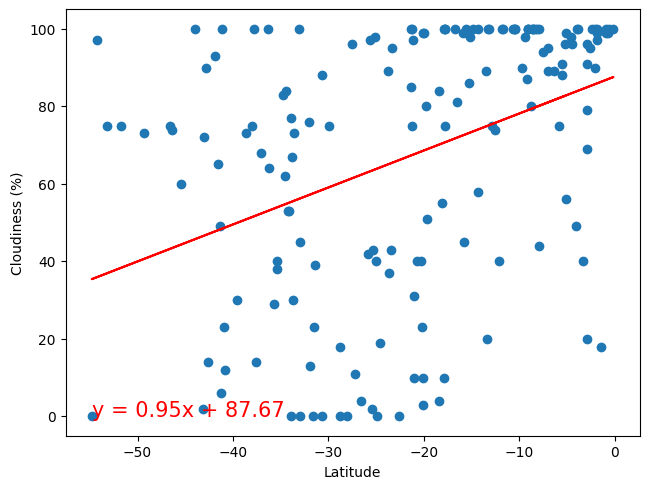

In [131]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is  r=0.28, which means there is a weak positive correlation between latitude and cloudiness percentage in the Northern Hemisphere.
In other words as latitude increases (moving away from the equator), cloudiness percentage tends to increase, but the correlation is not strong.

Linear regression on Southern Hemisphere is r=0.39 which means there is a weak positive correlation between latitude and cloudiness percentage in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), cloudiness percentage tends to increase, but the correlation is not strong.

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14863739398040088


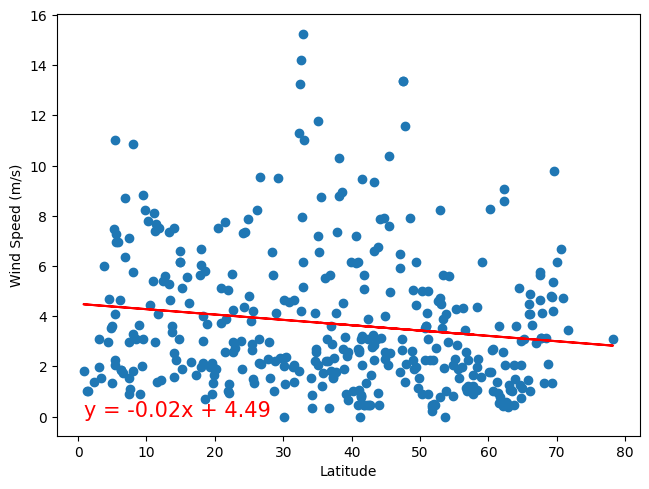

In [132]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.21646206350348215


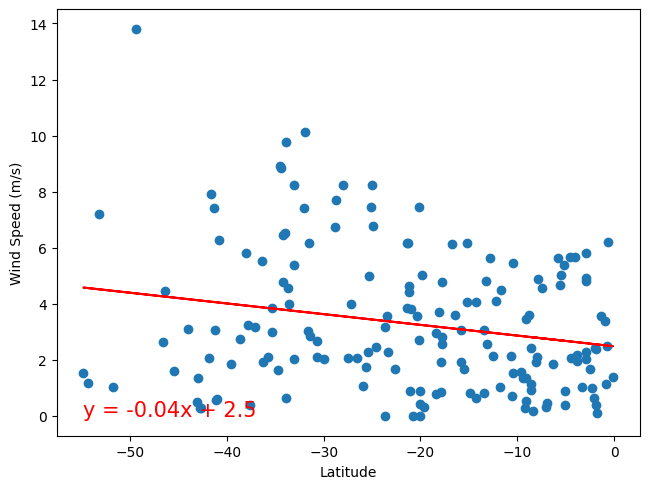

In [133]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

Discussion about the linear relationship: 
again, in both the cases r- values, indicating a very weak correlation between latitude and wind speed. This suggests that latitude alone may not be a strong predictor of wind speed, and other factors may play a more significant role in influencing wind speed.